![Astrofisica Computacional](../logo.PNG)

---
## Motion of a Particle in the Kerr Spacetime

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Summary

In this notebook we implement a code that integrates the equtions of motion of a test particle in the Kerr spacetime.


---

In [1]:
#%matplotlib notebook
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Metric Tensor

\begin{equation}
g_{\mu \nu} = \left[
\begin{matrix}
-\left(1 - \frac{2Mr}{\Sigma} \right) & 0 & 0 & -\frac{2aMr\sin^2 \theta}{\Sigma}\\ 
0 & \frac{\Sigma}{\Delta} 0 & 0 &\\
0 & 0 & \Sigma & 0\\
-\frac{2aMr\sin^2 \theta}{\Sigma} & 0 & 0 & \left( r^2 + a^2 + \frac{2a^2Mr \sin^2 \theta}{\Sigma} \right) \sin^2 \theta  
\end{matrix} 
\right]
\end{equation}

\begin{align}
\Delta = &r^2 - 2Mr + a^2\\
\Sigma = &r^2 + a^2 \cos^2 \theta
\end{align}

In [2]:
def g(x):
    '''
    This procedure evaluates the Kerr metric 
    tensor in spherical coordinates at a given point.
    '''

    # Coordinates 
    t = x[0]
    r = x[1]
    theta = x[2]
    phi = x[3]
    
    Delta = r**2 - 2*M*r + a**2
    Sigma = r**2 + (a*np.cos(theta))**2
    
    # Metric components
    gtt = -(1. - 2.*M*r/Sigma)
    grr = Sigma/Delta
    gthth = Sigma
    gphph = (r**2 + a**2 + 2*(a**2)*M*r*np.sin(theta)**2/Sigma)* np.sin(theta)**2
    gtph = -2*a*M*r*np.sin(theta)**2/Sigma
    
    return [gtt, grr, gthth, gphph, gtph]


### Equations of Motion

The equations of motion for the particle are

\begin{align*}
	\dot{t} &= \frac{1}{2\Delta \Sigma} \frac{\partial \Xi}{\partial E}\\
	\dot{r} &= \frac{\Delta}{\Sigma} p_r \\
	\dot{\theta} &= \frac{p_\theta}{\Sigma}\\
	\dot{\phi} &= - \frac{1}{2\Delta \Sigma} \frac{\partial \Xi}{\partial L}\\	
\dot{p}_t &= 0\\
\dot{p}_r &= -\frac{\partial}{\partial r}\left( \frac{\Delta}{2\Sigma}\right) p_r^2 - \frac{\partial}{\partial r}\left( \frac{1}{2\Sigma}\right) p_\theta^2 + \frac{\partial}{\partial r}\left( \frac{\Xi}{2\Delta \Sigma}\right) \\
\dot{p}_\theta &= -\frac{\partial}{\partial \theta}\left( \frac{\Delta}{2\Sigma}\right) p_r^2 - \frac{\partial}{\partial \theta}\left( \frac{1}{2\Sigma}\right) p_\theta^2 + \frac{\partial}{\partial \theta}\left( \frac{\Xi}{2\Delta \Sigma}\right)\\
\dot{p}_\phi &= 0\\	
\end{align*}

where we use the auxilar functions

\begin{align}
	R &= W^2 - (r^2 - 2Mr + a^2) \left[ r^2 + (L-aE)^2 + Q \right]\\
	W &= E(r^2 + a^2) - aL\\
	\Theta &= Q - \cos^2 \theta \left[ a^2 (1-E^2) + \frac{L^2}{\sin^2 \theta} \right]
\end{align}


This gives the function

\begin{align}
	\Xi = &R + \Delta \Theta \nonumber \\
	\Xi = &W^2 - \Delta  \left[ r^2 + (L-aE)^2 + Q \right] + \Delta Q  - \Delta \cos^2 \theta  \left[ a^2 (1-E^2) + \frac{L^2}{\sin^2 \theta} \right] \nonumber \\ 
	\Xi = &W^2  - \Delta \left[ r^2 + (L-aE)^2  
	+  a^2 (1-E^2)  \cos^2 \theta + \frac{\cos^2 \theta }{\sin^2 \theta} L^2  \right] 
\end{align}

and the derivatives

\begin{align}
\frac{\partial \Xi}{\partial E} &= 2W(r^2 + a^2) + 2a \Delta (L-aE) + 2E a^2 \Delta \cos^2 \theta   \\
										&= 2W(r^2 + a^2) + 2a \Delta \left( L-aE  + aE  \cos^2 \theta \right)  \\
										&= 2W(r^2 + a^2) + 2a \Delta \left( L-aE \sin^2 \theta \right)\\
\frac{\partial \Xi}{\partial L} &= - 2a W - 2 \Delta (L-aE) - 2L \Delta \frac{\cos^2 \theta }{\sin^2 \theta}   \nonumber \\
						&= - 2a W + 2 aE \Delta   - 2L \Delta \left[ 1 + \frac{\cos^2 \theta }{\sin^2 \theta} \right] \nonumber \\											
						&= - 2a W + 2 aE \Delta   - 2L \Delta \csc^2 \theta . 
\end{align}




Since 
\begin{equation}
\frac{\partial \Delta}{\partial r} = 2(r-M)
\end{equation}
and 
\begin{equation}
\frac{\partial \Sigma}{\partial r} = 2r,
\end{equation}
we obtain the derivatives
\begin{align}
\frac{\partial}{\partial r}\left( \frac{\Delta}{2\Sigma}\right) &= \frac{1}{2\Sigma} \frac{\partial \Delta}{\partial r} - \frac{\Delta}{2\Sigma^2} \frac{\partial \Sigma}{\partial r} = \frac{r-M}{\Sigma} - \frac{r\Delta}{\Sigma^2} \\
\frac{\partial}{\partial r}\left( \frac{1}{2\Sigma}\right) &= - \frac{1}{2\Sigma^2} \frac{\partial \Sigma}{\partial r} = - \frac{r}{\Sigma^2} \\
\frac{\partial}{\partial r}\left( \frac{\Xi}{2\Delta \Sigma}\right) &= \frac{1}{2\Delta \Sigma} \frac{\partial \Xi}{\partial r} -\frac{\Xi}{2\Delta^2 \Sigma} \frac{\partial \Delta}{\partial r} -\frac{\Xi}{2\Delta \Sigma^2} \frac{\partial \Sigma}{\partial r}  \nonumber \\
&= \frac{1}{2\Delta \Sigma} \frac{\partial \Xi}{\partial r} -\frac{\Xi (r-M)}{\Delta^2 \Sigma} -\frac{\Xi r}{\Delta \Sigma^2} 
\end{align}
where
\begin{equation}
\frac{\partial \Xi}{\partial r}  = 4rEW - 2(r-M) \left[ r^2 + (L-aE)^2  
	+  a^2 (1-E^2)  \cos^2 \theta + \frac{\cos^2 \theta }{\sin^2 \theta} L^2  \right] -2r \Delta.
\end{equation}

Similarly, since
\begin{equation}
\frac{\partial \Delta}{\partial \theta} = 0
\end{equation}
and 
\begin{equation}
\frac{\partial \Sigma}{\partial \theta} = -2a^2 \cos \theta \sin \theta ,
\end{equation}
we have the derivatives
\begin{align}
\frac{\partial}{\partial \theta}\left( \frac{\Delta}{2\Sigma}\right) &= - \frac{\Delta}{2\Sigma^2} \frac{\partial \Sigma}{\partial \theta} =  \frac{\Delta}{\Sigma^2} a^2 \cos \theta \sin \theta \\
\frac{\partial}{\partial \theta}\left( \frac{1}{2\Sigma}\right) &= - \frac{1}{2\Sigma^2} \frac{\partial \Sigma}{\partial \theta} =  \frac{a^2 \cos \theta \sin \theta}{\Sigma^2}  \\
\frac{\partial}{\partial \theta}\left( \frac{\Xi}{2\Delta \Sigma}\right) &= \frac{1}{2\Delta\Sigma} \frac{\partial \Xi}{\partial \theta} - \frac{\Xi}{2\Delta\Sigma^2} \frac{\partial \Sigma}{\partial \theta} \nonumber \\
&= \frac{1}{2\Delta\Sigma} \left[ 2\Delta a^2 (1-E^2) \cos \theta \sin \theta + 2\Delta L^2 \cot \theta \csc ^2 \theta \right] + \frac{\Xi}{\Delta\Sigma^2} a^2 \cos \theta \sin \theta \nonumber \\
&= \frac{1}{\Sigma} \left[  a^2 (1-E^2) \cos \theta \sin \theta + L^2 \cot \theta \csc ^2 \theta \right] + \frac{\Xi}{\Delta\Sigma^2} a^2 \cos \theta \sin \theta 
\end{align}

In [3]:
def geodesics(q, tau):
    '''
    This function contains the geodesic equations 
    from the Hamilton-Jacobi formulation for the Kerr metric
    '''
    # Coordinates and momentum components
    t = q[0]
    r = q[1]
    theta = q[2]
    phi = q[3]
    p_t = q[4]
    p_r = q[5]
    p_th = q[6]
    p_phi = q[7]

    # Conserved Quantities
    E = - p_t
    L = p_phi
    
    # Auxiliar Functions
    Sigma = r**2 + a**2 * np.cos(theta)**2
    Delta = r**2 - 2.*M*r + a**2

    W = E*(r**2 + a**2) - a*L 
    partXi = r**2 + (L - a*E)**2 + a**2 *(1 - E**2)*np.cos(theta)**2 + (L*np.cos(theta)/np.sin(theta))**2
    Xi = W**2 - Delta*partXi

    dXidE = 2.*W*(r**2 + a**2) + 2.*a*Delta*(L - a*E*np.sin(theta)**2)
    dXidL = -2.*a*W + 2.*a*E*Delta - 2.*L*Delta/(np.sin(theta)**2)

    dXidr = 4.*r*E*W - 2.*(r - M)*partXi - 2.*r*Delta 

    dAdr = (r - M)/Sigma - (r*Delta)/(Sigma**2)
    dBdr = -r/Sigma**2
    dCdr = dXidr/(2.*Delta*Sigma) - (Xi*(r-M))/(Sigma*Delta**2) - r*Xi/(Delta*Sigma**2)

    auxth = (a**2) * np.cos(theta)*np.sin(theta)

    dAdth = Delta*auxth/(Sigma**2)
    dBdth = auxth/(Sigma**2)
    dCdth = ((1-E**2)*auxth + L**2 * np.cos(theta)/(np.sin(theta)**3) )/Sigma + (Xi/(Delta*Sigma**2))*auxth



    # Geodesics differential equations 
    dtdtau = dXidE/(2.*Delta*Sigma)
    drdtau = (Delta/Sigma)*p_r
    dthdtau = p_th/Sigma
    dphidtau = - dXidL/(2.*Delta*Sigma)
    
    dp_tdtau = 0.
    dp_rdtau = -dAdr*p_r**2 - dBdr*p_th**2 + dCdr 
    dp_thdtau = -dAdth*p_r**2 - dBdth*p_th**2 + dCdth 
    dp_phidtau = 0.

    return [dtdtau, drdtau, dthdtau, dphidtau,
            dp_tdtau, dp_rdtau, dp_thdtau, dp_phidtau]

### Initial Conditions

Given the intial values $x^\mu_0 = [0,r_0,\theta_0,\phi_0]$ and $\vec{k}_0 = [k^t_0,k^r_0, k^\theta_0,k^\phi_0]$, this function will give the initial conditions vector $[0,r_0,\theta_0,\phi_0, (k_t)_0, (k_r)_0, (k_\theta)_0, (k_\phi)_0]$ to use in the integration algorithm.

In [4]:
def initCond(x, p, metric):
    '''
    Given the initial conditions (x,k)
    this function returns the list
    [t, r, theta, phi, k_t, k_r, k_theta, k_phi] 
    with the initial conditions needed to solve 
    the geodesic equations 
    (with the covariant components of the momentum vector)
    '''
    
    # Coordinates and momentum components
    t = x[0]
    r = x[1]
    theta = x[2]
    phi = x[3]
    
    pr = p[0]
    pth = p[1]
    pphi = p[2]
    
    g = metric(x)
    
    # Metric components
    g_tt = g[0]
    g_rr = g[1]
    g_thth = g[2]
    g_phph = g[3]
    g_tphi = g[4]
    
    pt = (-g_tphi*pphi + np.sqrt((g_tphi*pphi)**2 - g_tt*(delta + g_rr*pr**2 + g_thth*pth**2 + g_phph*pphi**2)))/g_tt
    
    # Lower k-indices
    p_t = g_tt*pt + g_tphi*pphi
    p_r = g_rr*pr
    p_th = g_thth*pth
    p_phi = g_phph*pphi + g_tphi*pt
    
    return [t, r, theta, phi, p_t, p_r, p_th, p_phi]

### Plot

We implement two plotting functions,

In [5]:
def plot(sol, ps=False, ISCO=False):
    indx = len(sol[:,1])
    for i in range(indx):
        if sol[i,1]<EH+1e-2: 
            indx = i
            break
    x = sol[:indx,1]*np.cos(sol[:indx,3])
    y = sol[:indx,1]*np.sin(sol[:indx,3])
    
    BH = plt.Circle((0, 0), EH, color='k')
    ps = plt.Circle((0, 0), 3*M, fill=False, linestyle=':', label='Photon Sphere')
    ISCO = plt.Circle((0, 0), 6*M, fill=False, linestyle='--', label='ISCO')
    
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.plot(x,y, color='crimson', label='Test particle')
    ax.add_patch(BH)
    if ps==True:
        ax.add_patch(ps)
    if ISCO==True:
        ax.add_patch(ISCO)
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.grid(alpha=0.2)
    ax.axvline(0, c='k', alpha=0.1)
    ax.axhline(0, c='k', alpha=0.1)
    plt.legend()
    plt.show()



---
## Integration of the Equations of Motion

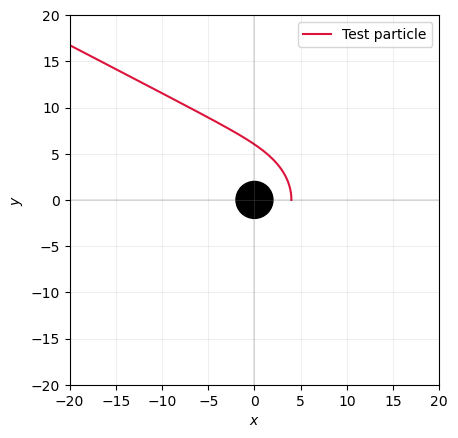

In [10]:
M = 1
a = 0.
delta = 0

# Event Horizon
EH = M + np.sqrt(M**2 - a**2)

# Initial Conditions
t0 = 0.
r0 = 4.
theta0 = np.pi/2
phi0 = 0.

pr0 = 0.
pth0 = 0.
pphi0 = 1.

x = [t0, r0, theta0, phi0]
p = [pr0, pth0,pphi0]


ic = initCond(x, p, g)

lmbda = np.linspace(0,40,400)

sol = odeint(geodesics, ic, lmbda)
plot(sol)

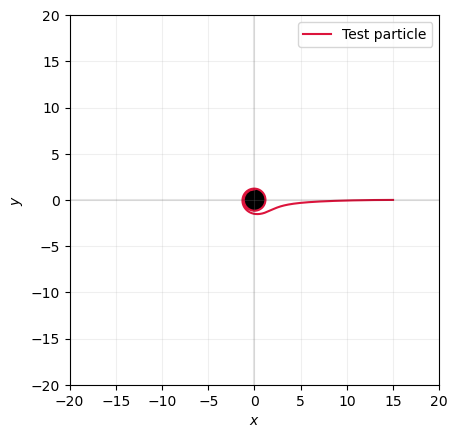

In [12]:
M = 1
a = 0.99
delta = 1

# Event Horizon
EH = M + np.sqrt(M**2 - a**2)

# Initial Conditions
t0 = 0.
r0 = 15.
theta0 = np.pi/2
phi0 = 0.

pr0 = - 0.1
pth0 = 0.
pphi0 = 0.

x = [t0, r0, theta0, phi0]
p = [pr0, pth0,pphi0]


ic = initCond(x, p, g)

lmbda = np.linspace(0,100,100000)

sol = odeint(geodesics, ic, lmbda)
plot(sol)

## Photon Sphere and the Shadow of the Black Hole

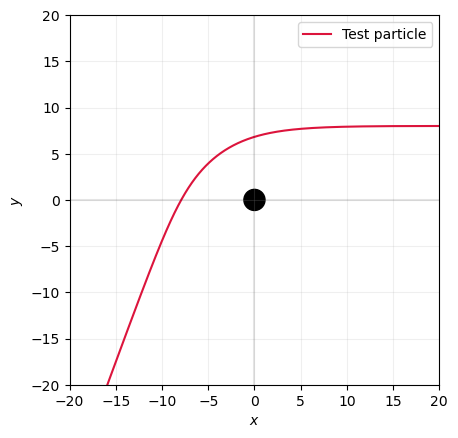

In [53]:
M = 1
a=0.99
delta = 0

# Event Horizon
EH = M + np.sqrt(M**2 - a**2)

# Initial Conditions
t0 = 0.
theta0 = np.pi/2
kth0 = 0.

x0 = 20
y0 = 8
r0 = np.sqrt(x0**2 + y0**2)
phi0 = np.arctan(y0/x0)

v0 = 1
kr0 = -v0*np.cos(phi0)
kphi0 = v0*np.sin(phi0)/r0

x = [t0, r0, theta0, phi0]
k = [kr0, kth0, kphi0]

ic = initCond(x, k, g)

sol = odeint(geodesics, ic, lmbda)
plot(sol)

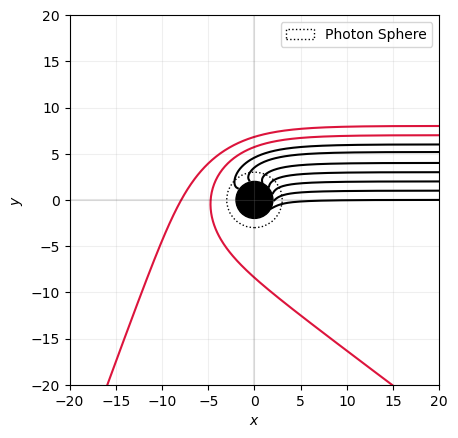

In [54]:
def plotmany(p_coords):
    BH = plt.Circle((0, 0), 2*M, color='k')
    ps = plt.Circle((0, 0), 3*M, fill=False, linestyle=':', label='Photon Sphere')
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.add_patch(BH)
    ax.add_patch(ps)
    
    lmbda = np.linspace(0,60,500)
    for p in p_coords:
        color = 'crimson'
        sol = odeint(geodesics, p, lmbda)
        indx = len(sol[:,1])
        for i in range(indx):
            if sol[i,1]<2.+1e-10: 
                indx = i
                color = 'black'
                break
        x = sol[:indx,1]*np.cos(sol[:indx,3])
        y = sol[:indx,1]*np.sin(sol[:indx,3])
        ax.plot(x,y, color=color)

    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.grid(alpha=0.2)
    ax.axvline(0, c='k', alpha=0.1)
    ax.axhline(0, c='k', alpha=0.1)
    plt.legend()
    plt.show()

    
M = 1
a= 0.99
delta = 0

# Event Horizon
EH = M + np.sqrt(M**2 - a**2)


t0 = 0.
theta0 = np.pi/2
kth0 = 0.

yy = [0,1,2,3,4,5.181,6,7,8]
p_coords = []

# Initial Conditions
for y0 in yy:
    x0 = 20
    
    r0 = np.sqrt(x0**2 + y0**2)
    phi0 = np.arctan(y0/x0)

    v0 = 1
    kr0 = -v0*np.cos(phi0)
    kphi0 = v0*np.sin(phi0)/r0

    x = [t0, r0, theta0, phi0]
    k = [kr0, kth0, kphi0]

    ic = initCond(x, k, g)
    p_coords.append(ic)

    
plotmany(p_coords)

In [9]:
def geodesics(q, tau):
    '''
    This function contains the geodesic equations 
    in Hamiltonian form for the Schwarzschild metric
    '''
    # Coordinates and momentum components
    t = q[0]
    r = q[1]
    theta = q[2]
    phi = q[3]
    k_t = q[4]
    k_r = q[5]
    k_th = q[6]
    k_phi = q[7]

    # Conserved Quantities
    E = - k_t
    L = k_phi

    # Geodesics differential equations 
    dtdtau = E*r**2./(r**2 - 2.*M*r)
    drdtau = (1. - 2.*M/r)*k_r
    dthdtau = k_th/r**2
    dphidtau = L/((r**2)*np.sin(theta)**2)
    
    dk_tdtau = 0.
    dk_rdtau = -M*(k_r**2/r**2) + k_th**2/r**3 + L**2/((r**3)*np.sin(theta)**2) - M*(E**2/(r-2.*M)**2) 
    dk_thdtau = (np.cos(theta)/np.sin(theta)**3)*(L**2/r**2)
    dk_phidtau = 0.
    

    return [dtdtau, drdtau, dthdtau, dphidtau, 
              dk_tdtau, dk_rdtau, dk_thdtau, dk_phidtau]